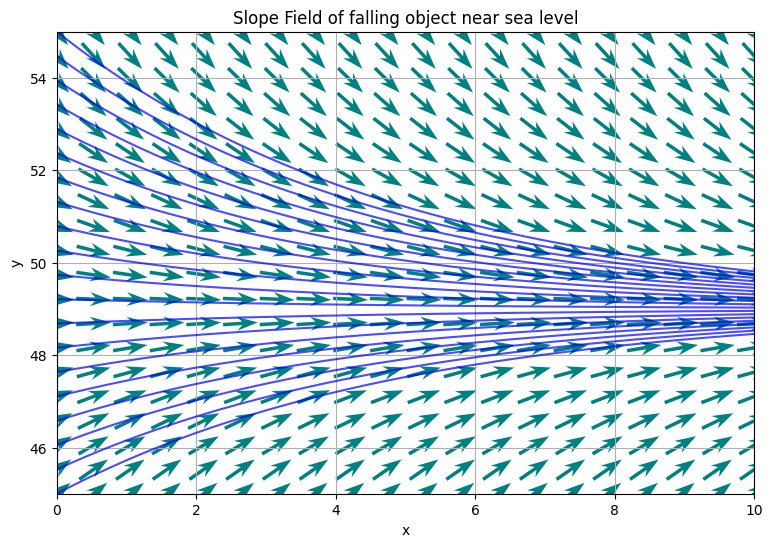

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import *

# Define the differential equation y' = df
def df(x, y):
    return (9.8 - y/5)

# Create figure
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)

# Define the grid for the slope field
minx, maxx, xsteps = 0, 10, 20
miny, maxy, ysteps = 45, 55, 20

# Create a meshgrid
x_vals = np.linspace(minx, maxx, xsteps)
y_vals = np.linspace(miny, maxy, ysteps)
x, y = np.meshgrid(x_vals, y_vals)

# Direction vectors: for a slope field, dx = 1, dy = df(x,y)
u = np.ones_like(x)
v = df(x, y)

N = np.sqrt(u**2 + v**2)
u_norm = u / N
v_norm = v / N

# Plot the slope field
ax.quiver(
    x, y, u_norm, v_norm,
    color='teal',
    pivot='middle',
    scale=20,          # Adjusted scale for better arrow length
    width=0.005,       # Slightly thicker arrows
    headwidth=4,       # Larger arrow heads
    headlength=6,
    minlength=0.1
)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_title("Slope Field of falling object near sea level")


# ----------------------------------------------------------
# OPTIONAL: Plot a few solution curves on top of the slope field

# x-range for solution curves
xs = np.linspace(minx, maxx, 200)

# Choose some initial conditions for y at x=0 (y0 values)
initial_ys = np.linspace(miny, maxy, ysteps)

# Solve and plot
for y0 in initial_ys:
    sol = odeint(lambda Y, X: df(X, Y), y0, xs)
    ax.plot(xs, sol, 'b', linewidth=1.5, alpha=0.7)


plt.grid(True)
plt.show()
